## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.744025 -1.459548  0.910990 -1.517823  1.349667 -1.228330
1 -0.138309  0.686835  0.462039 -1.124290 -1.520835 -0.850081
2  1.035888 -0.807293 -0.782985  1.124380 -0.775672  0.627268
3  0.221774 -1.181408  1.630161 -0.825234 -0.146708 -0.643435
4 -0.485244 -1.579668  1.822775 -1.076671  0.174414 -0.941185


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9733291	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9647574	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9556292	total: 59ms	remaining: 19.6s
3:	learn: 0.9457956	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9367735	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9278193	total: 60.5ms	remaining: 10s
6:	learn: 0.9170752	total: 61ms	remaining: 8.65s
7:	learn: 0.9084364	total: 61.5ms	remaining: 7.63s
8:	learn: 0.8998319	total: 62ms	remaining: 6.82s
9:	learn: 0.8914303	total: 62.4ms	remaining: 6.18s
10:	learn: 0.8825666	total: 63ms	remaining: 5.66s
11:	learn: 0.8741400	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8657411	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8582371	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8507648	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8431014	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8355013	total: 65.9ms	remaining: 3.81s
17:	learn: 0.8282916	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8206247	total: 66.9ms	remaining: 3.45s
19

104:	learn: 0.3876104	total: 110ms	remaining: 934ms
105:	learn: 0.3844728	total: 110ms	remaining: 930ms
106:	learn: 0.3814334	total: 111ms	remaining: 924ms
107:	learn: 0.3781945	total: 111ms	remaining: 919ms
108:	learn: 0.3752931	total: 112ms	remaining: 914ms
109:	learn: 0.3720542	total: 112ms	remaining: 908ms
110:	learn: 0.3694037	total: 113ms	remaining: 903ms
111:	learn: 0.3660928	total: 113ms	remaining: 898ms
112:	learn: 0.3631860	total: 114ms	remaining: 894ms
113:	learn: 0.3602313	total: 114ms	remaining: 890ms
114:	learn: 0.3570024	total: 115ms	remaining: 884ms
115:	learn: 0.3545132	total: 116ms	remaining: 881ms
116:	learn: 0.3516952	total: 116ms	remaining: 875ms
117:	learn: 0.3499829	total: 117ms	remaining: 871ms
118:	learn: 0.3463224	total: 117ms	remaining: 866ms
119:	learn: 0.3437886	total: 118ms	remaining: 862ms
120:	learn: 0.3415576	total: 118ms	remaining: 857ms
121:	learn: 0.3392475	total: 118ms	remaining: 852ms
122:	learn: 0.3366704	total: 119ms	remaining: 848ms
123:	learn: 

268:	learn: 0.1172585	total: 188ms	remaining: 511ms
269:	learn: 0.1163976	total: 188ms	remaining: 509ms
270:	learn: 0.1156438	total: 189ms	remaining: 508ms
271:	learn: 0.1148594	total: 189ms	remaining: 506ms
272:	learn: 0.1141224	total: 190ms	remaining: 505ms
273:	learn: 0.1133031	total: 190ms	remaining: 504ms
274:	learn: 0.1127263	total: 191ms	remaining: 502ms
275:	learn: 0.1119729	total: 191ms	remaining: 501ms
276:	learn: 0.1111402	total: 191ms	remaining: 499ms
277:	learn: 0.1104832	total: 192ms	remaining: 498ms
278:	learn: 0.1097888	total: 192ms	remaining: 497ms
279:	learn: 0.1089734	total: 193ms	remaining: 496ms
280:	learn: 0.1081653	total: 193ms	remaining: 494ms
281:	learn: 0.1074999	total: 193ms	remaining: 492ms
282:	learn: 0.1067806	total: 194ms	remaining: 491ms
283:	learn: 0.1060647	total: 194ms	remaining: 489ms
284:	learn: 0.1052939	total: 194ms	remaining: 488ms
285:	learn: 0.1046250	total: 195ms	remaining: 486ms
286:	learn: 0.1039954	total: 195ms	remaining: 485ms
287:	learn: 

469:	learn: 0.0441296	total: 294ms	remaining: 331ms
470:	learn: 0.0438946	total: 295ms	remaining: 331ms
471:	learn: 0.0436221	total: 295ms	remaining: 330ms
472:	learn: 0.0434246	total: 296ms	remaining: 330ms
473:	learn: 0.0433735	total: 296ms	remaining: 329ms
474:	learn: 0.0431710	total: 297ms	remaining: 328ms
475:	learn: 0.0429457	total: 297ms	remaining: 327ms
476:	learn: 0.0426937	total: 298ms	remaining: 326ms
477:	learn: 0.0424967	total: 298ms	remaining: 326ms
478:	learn: 0.0423036	total: 299ms	remaining: 325ms
479:	learn: 0.0420853	total: 299ms	remaining: 324ms
480:	learn: 0.0418581	total: 299ms	remaining: 323ms
481:	learn: 0.0417069	total: 300ms	remaining: 322ms
482:	learn: 0.0414846	total: 300ms	remaining: 322ms
483:	learn: 0.0413557	total: 301ms	remaining: 321ms
484:	learn: 0.0411360	total: 301ms	remaining: 320ms
485:	learn: 0.0411020	total: 302ms	remaining: 319ms
486:	learn: 0.0408647	total: 302ms	remaining: 319ms
487:	learn: 0.0406646	total: 303ms	remaining: 318ms
488:	learn: 

630:	learn: 0.0204875	total: 372ms	remaining: 218ms
631:	learn: 0.0204282	total: 373ms	remaining: 217ms
632:	learn: 0.0203650	total: 374ms	remaining: 217ms
633:	learn: 0.0202924	total: 374ms	remaining: 216ms
634:	learn: 0.0202314	total: 375ms	remaining: 215ms
635:	learn: 0.0201273	total: 375ms	remaining: 215ms
636:	learn: 0.0200289	total: 375ms	remaining: 214ms
637:	learn: 0.0199882	total: 376ms	remaining: 213ms
638:	learn: 0.0199305	total: 376ms	remaining: 213ms
639:	learn: 0.0198909	total: 377ms	remaining: 212ms
640:	learn: 0.0197744	total: 377ms	remaining: 211ms
641:	learn: 0.0197204	total: 381ms	remaining: 212ms
642:	learn: 0.0196820	total: 381ms	remaining: 212ms
643:	learn: 0.0196377	total: 382ms	remaining: 211ms
644:	learn: 0.0195851	total: 382ms	remaining: 210ms
645:	learn: 0.0194720	total: 383ms	remaining: 210ms
646:	learn: 0.0193785	total: 383ms	remaining: 209ms
647:	learn: 0.0193421	total: 384ms	remaining: 208ms
648:	learn: 0.0192645	total: 385ms	remaining: 208ms
649:	learn: 

850:	learn: 0.0100979	total: 478ms	remaining: 83.7ms
851:	learn: 0.0100718	total: 479ms	remaining: 83.1ms
852:	learn: 0.0100417	total: 479ms	remaining: 82.6ms
853:	learn: 0.0100364	total: 480ms	remaining: 82ms
854:	learn: 0.0100069	total: 480ms	remaining: 81.4ms
855:	learn: 0.0099974	total: 480ms	remaining: 80.8ms
856:	learn: 0.0099628	total: 481ms	remaining: 80.2ms
857:	learn: 0.0099338	total: 481ms	remaining: 79.6ms
858:	learn: 0.0099287	total: 482ms	remaining: 79.1ms
859:	learn: 0.0098948	total: 482ms	remaining: 78.5ms
860:	learn: 0.0098897	total: 483ms	remaining: 78ms
861:	learn: 0.0098429	total: 483ms	remaining: 77.4ms
862:	learn: 0.0098339	total: 484ms	remaining: 76.8ms
863:	learn: 0.0098007	total: 484ms	remaining: 76.2ms
864:	learn: 0.0097548	total: 484ms	remaining: 75.6ms
865:	learn: 0.0097498	total: 485ms	remaining: 75.1ms
866:	learn: 0.0097249	total: 486ms	remaining: 74.5ms
867:	learn: 0.0096965	total: 486ms	remaining: 73.9ms
868:	learn: 0.0096920	total: 486ms	remaining: 73.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

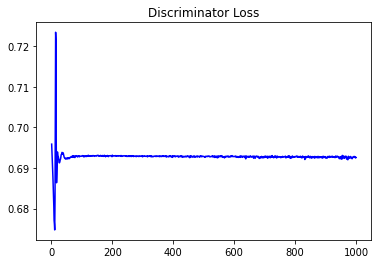

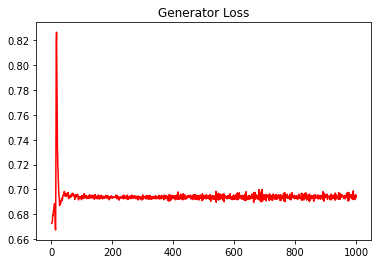

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09364574418175253


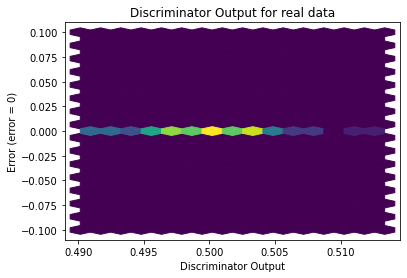

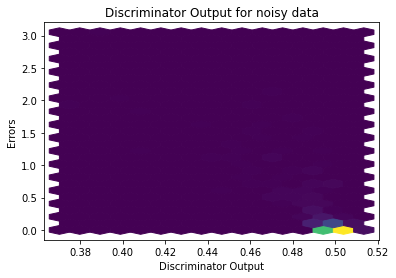

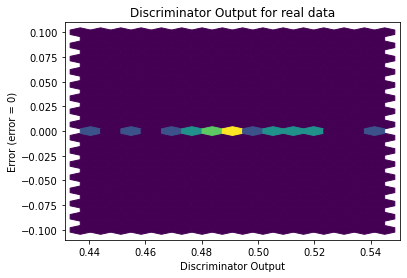

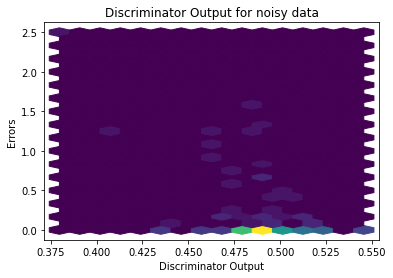

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


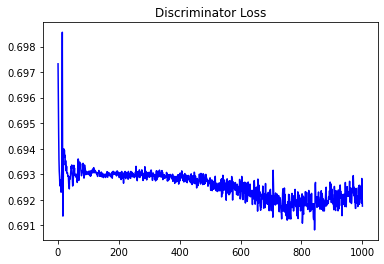

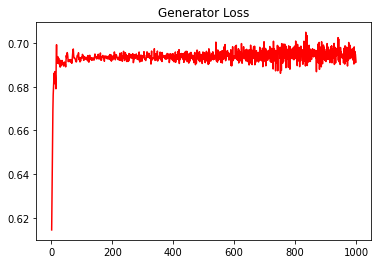

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07796553970194366


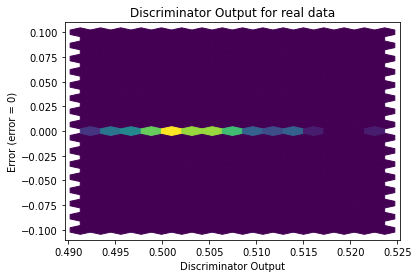

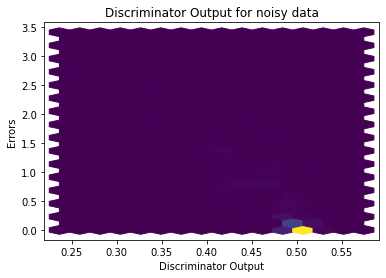

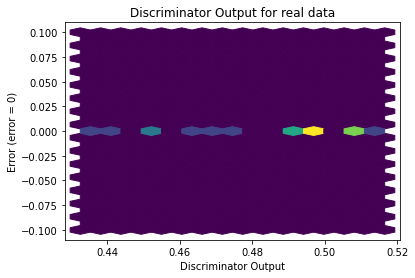

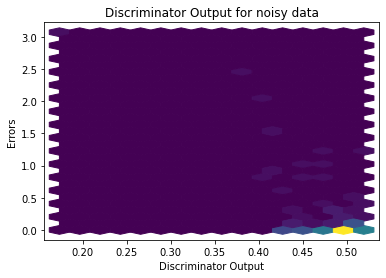

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0678]], requires_grad=True)
